In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, Normalize, ToTensor

In [2]:
transforms = Compose([
    Resize([32, 32]),
    ToTensor(),
    Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

dataset = ImageFolder("../../Datasets/Swedish_Traffic_Signs/FakeData/cropped_signs", transforms)
SIZE = len(dataset)
TRAIN = int(SIZE*0.8)
TEST = SIZE - TRAIN
train_dataset, test_dataset = random_split(dataset, [TRAIN, TEST])

train_dataloader = DataLoader(train_dataset, batch_size=16)
test_dataloader  = DataLoader(test_dataset, batch_size=16)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../../Datasets/Swedish_Traffic_Signs/FakeData/cropped_signs'

In [56]:
NUM_CLASSES = 19

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

In [57]:
CUDA = "cuda" if torch.cuda.is_available() else "cpu"
model.to(CUDA);

In [58]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()


Test: Acc: 0.91, F1: 0.82, Recall: 0.83, Precision: 0.85



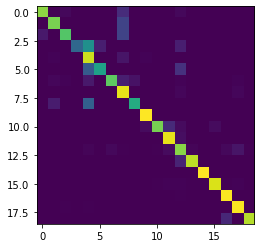


Test: Acc: 0.91, F1: 0.82, Recall: 0.83, Precision: 0.87


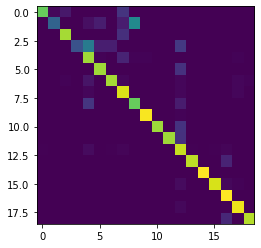


Test: Acc: 0.92, F1: 0.88, Recall: 0.85, Precision: 0.93


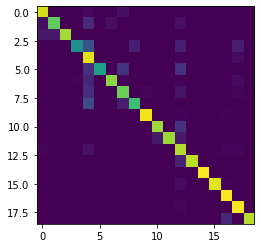


Test: Acc: 0.92, F1: 0.85, Recall: 0.85, Precision: 0.87


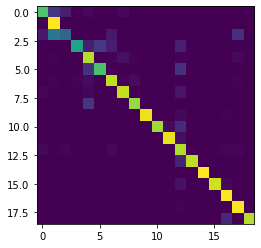


Test: Acc: 0.94, F1: 0.91, Recall: 0.90, Precision: 0.92


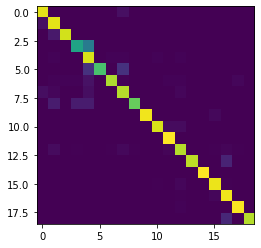


Test: Acc: 0.94, F1: 0.91, Recall: 0.91, Precision: 0.91


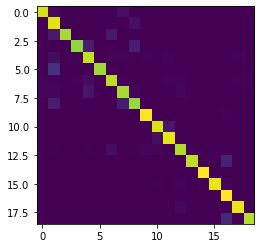


Test: Acc: 0.90, F1: 0.83, Recall: 0.85, Precision: 0.82


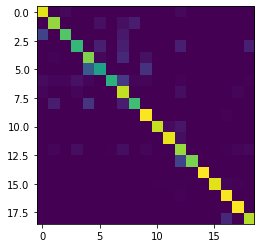


Test: Acc: 0.95, F1: 0.92, Recall: 0.91, Precision: 0.93


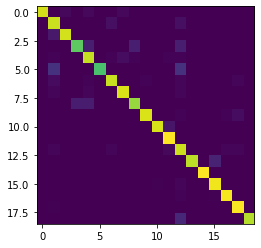


Test: Acc: 0.95, F1: 0.92, Recall: 0.91, Precision: 0.92


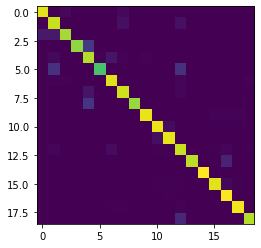


Test: Acc: 0.94, F1: 0.91, Recall: 0.91, Precision: 0.92


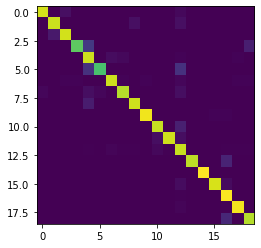

In [68]:
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    t = tqdm(train_dataloader)
    for i, (X, y) in enumerate(t):
        X = X.to(CUDA)
        y = y.to(CUDA)

        optimizer.zero_grad()

        preds = model(X)

        loss = criterion(preds, y)

        loss.backward()
        optimizer.step()

        running_loss += loss.cpu().detach()
        t.set_description(f"Train: {running_loss/(i+1)}")

    model.eval()
    predictions = list()
    targets = list()
    running_loss = 0
    t = tqdm(test_dataloader)
    for i, (X, y) in enumerate(t):
        X = X.to(CUDA)
        y = y.to(CUDA)

        preds = model(X)
        predictions += list(np.array(preds.argmax(axis=1).cpu()))
        targets += list(np.array(y.cpu()))

        loss = criterion(preds, y)

        running_loss += loss.cpu().detach()
        t.set_description(f"Test: {running_loss/(i+1)}")
        
    acc = accuracy_score(targets, predictions)
    f1 = f1_score(targets, predictions, average="macro")
    recall = recall_score(targets, predictions, average="macro")
    precision = precision_score(targets, predictions, average="macro")
    print(f"Test: Acc: {str(acc)[:5]}, F1: {str(f1)[:5]}, Recall: {str(recall)[:5]}, Precision: {str(precision)[:5]}")
    
    plt.imshow(confusion_matrix(targets, predictions, normalize="true"))
    plt.show()
